## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

### import所需套件

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

### 定義繪製confusion matrix的function

In [13]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')
            
    if target_names is not None:
        plt.xticks(np.arange(len(target_names)),target_names)
        plt.yticks(np.arange(len(target_names)),target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()

### Decision Tree for regression problem

In [14]:
# 讀取波士頓房價資料集，並檢查資料的shape
boston = datasets.load_boston()

df=pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

# 建立Decision tree regression model
reg1 = DecisionTreeRegressor(criterion = "mse", max_depth=None, min_samples_split = 2, min_samples_leaf = 1)

# 將訓練資料丟入模型訓練
reg1.fit(x_train, y_train)

# 將測試資料丟入模型取得預測結果
y_pred = reg1.predict(x_test)

# 利用R^2, MSE評估模型預測結果
print(f'r2 score: {r2_score(y_test, y_pred):.3f}')
print(f'MSE: {mean_squared_error(y_test,y_pred):.3f}')


r2 score: 0.601
MSE: 32.497


Text(0.5,1,'Decision Tree Regressor')

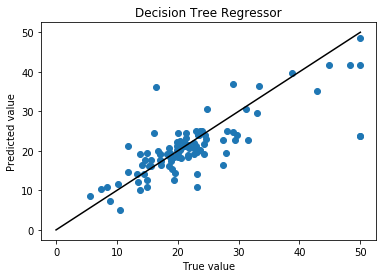

In [21]:
# 繪製圖形
plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50],'k')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('Decision Tree Regressor')

In [22]:
# 修改模型參數
# 建立Decision tree regression model
reg1 = DecisionTreeRegressor(criterion = "mse", max_depth=None, min_samples_split = 5, min_samples_leaf = 3)

# 將訓練資料丟入模型訓練
reg1.fit(x_train, y_train)

# 將測試資料丟入模型取得預測結果
y_pred = reg1.predict(x_test)

# 利用R^2, MSE評估模型預測結果
print(f'r2 score: {r2_score(y_test, y_pred):.3f}')
print(f'MSE: {mean_squared_error(y_test,y_pred):.3f}')

r2 score: 0.512
MSE: 39.733


Text(0.5,1,'Decision Tree Regressor: param_change')

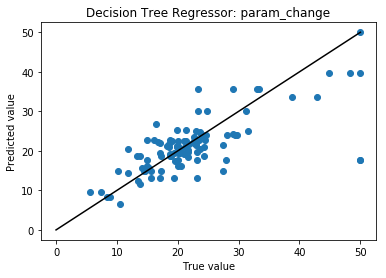

In [23]:
# 繪製圖形
plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50],'k')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('Decision Tree Regressor: param_change')

修改模型參數，增加min_samples_leaf，會使r2下降, MSE上升

### Decision Tree for classification problem

In [24]:
# 讀取wine dataset
wine = datasets.load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


accuracy: 0.972


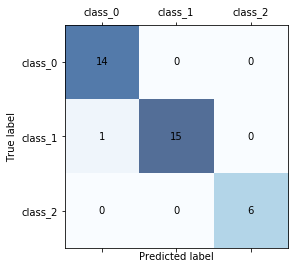

In [26]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

# 建立Decision tree classification model
clf = DecisionTreeClassifier(criterion = "gini", max_depth=None, min_samples_split = 2, min_samples_leaf = 1)

# 將訓練資料丟入模型訓練
clf.fit(x_train, y_train)

# 將測試資料丟入模型取得預測結果
y_pred = clf.predict(x_test)

# 利用accuracy評估模型預測結果
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')

# 繪製 confusion matrix
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, target_names = wine.target_names, title = "")

In [27]:
print(wine.feature_names)
print(f'Feature importance: {clf.feature_importances_}')

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance: [0.04073631 0.         0.         0.         0.         0.
 0.44473338 0.         0.         0.40766854 0.10686177 0.
 0.        ]


accuracy: 0.861


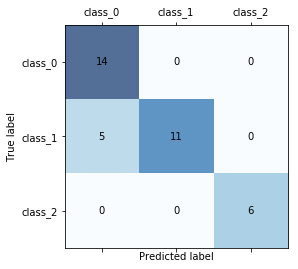

In [30]:
# 修改模型參數
# 建立Decision tree classification model
clf = DecisionTreeClassifier(criterion = "gini", max_depth=None, min_samples_split = 8, min_samples_leaf = 5)

# 將訓練資料丟入模型訓練
clf.fit(x_train, y_train)

# 將測試資料丟入模型取得預測結果
y_pred = clf.predict(x_test)

# 利用accuracy評估模型預測結果
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')

# 繪製 confusion matrix
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, target_names = wine.target_names, title = "")

In [31]:
print(wine.feature_names)
print(f'Feature importance: {clf.feature_importances_}')

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance: [0.         0.         0.         0.         0.         0.
 0.44672121 0.         0.         0.42578431 0.11161044 0.
 0.01588404]


修改模型參數，增加min_samples_leaf，會使accuracy下降